## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

### Load data

In [3]:
wine_data = load_wine(as_frame=True) # load data 

In [5]:
wine_data.data # 13 features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
wine_data.target # 0, 1, 2 for types of wines

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

### scaling and preprocessing

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
scaled_data = scaler.fit_transform(wine_data.data)
scaled_wine = pd.DataFrame(scaled_data, columns= wine_data.feature_names)

In [30]:
scaled_wine.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [32]:
features = wine_data.feature_names
target = wine_data.target

### Some plotting

In [34]:
# plot features based on name
def plt_for_feature(mainf):
    fig, ax = plt.subplots(12, 1, figsize = (12,24)) # divide subplots
    i = 0
    for feature in features:
        if feature != mainf:
            ax[i].scatter(scaled_wine[mainf], scaled_wine[feature], c= target)
            ax[i].set_xlabel(mainf)
            ax[i].set_ylabel(feature)
            i += 1

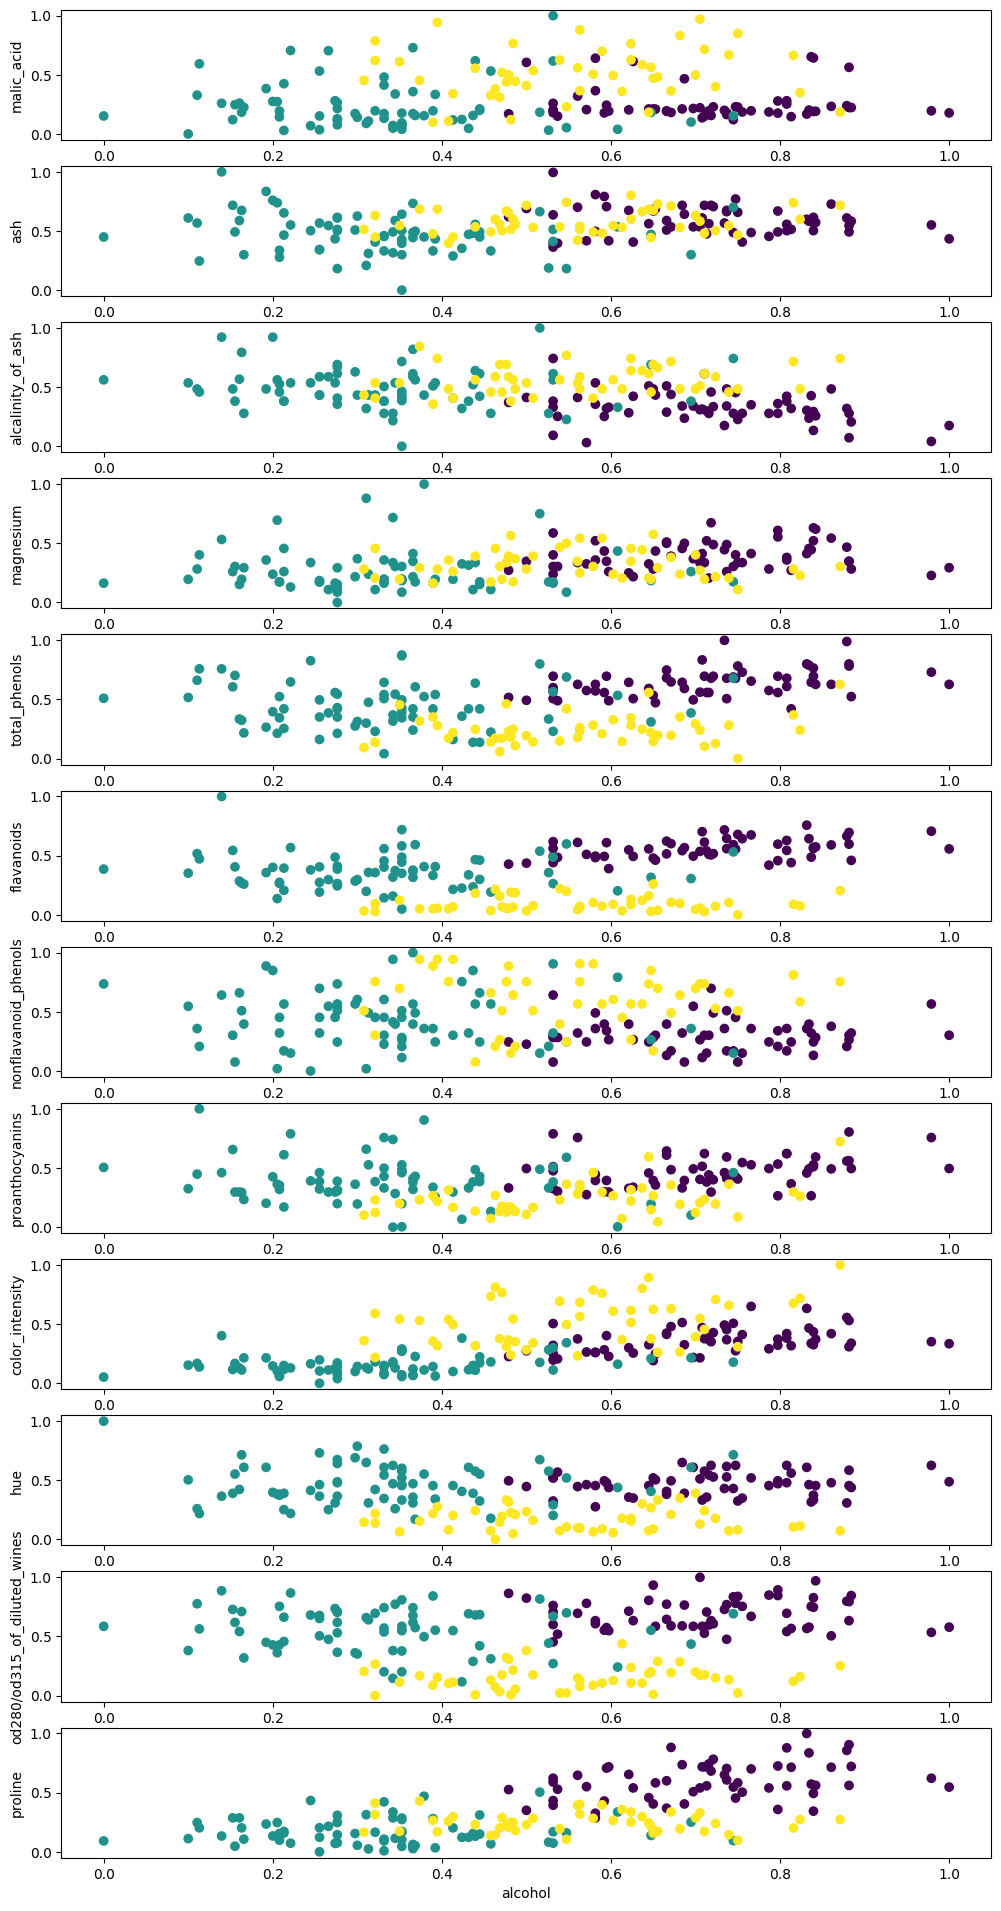

In [35]:
plt_for_feature('alcohol')

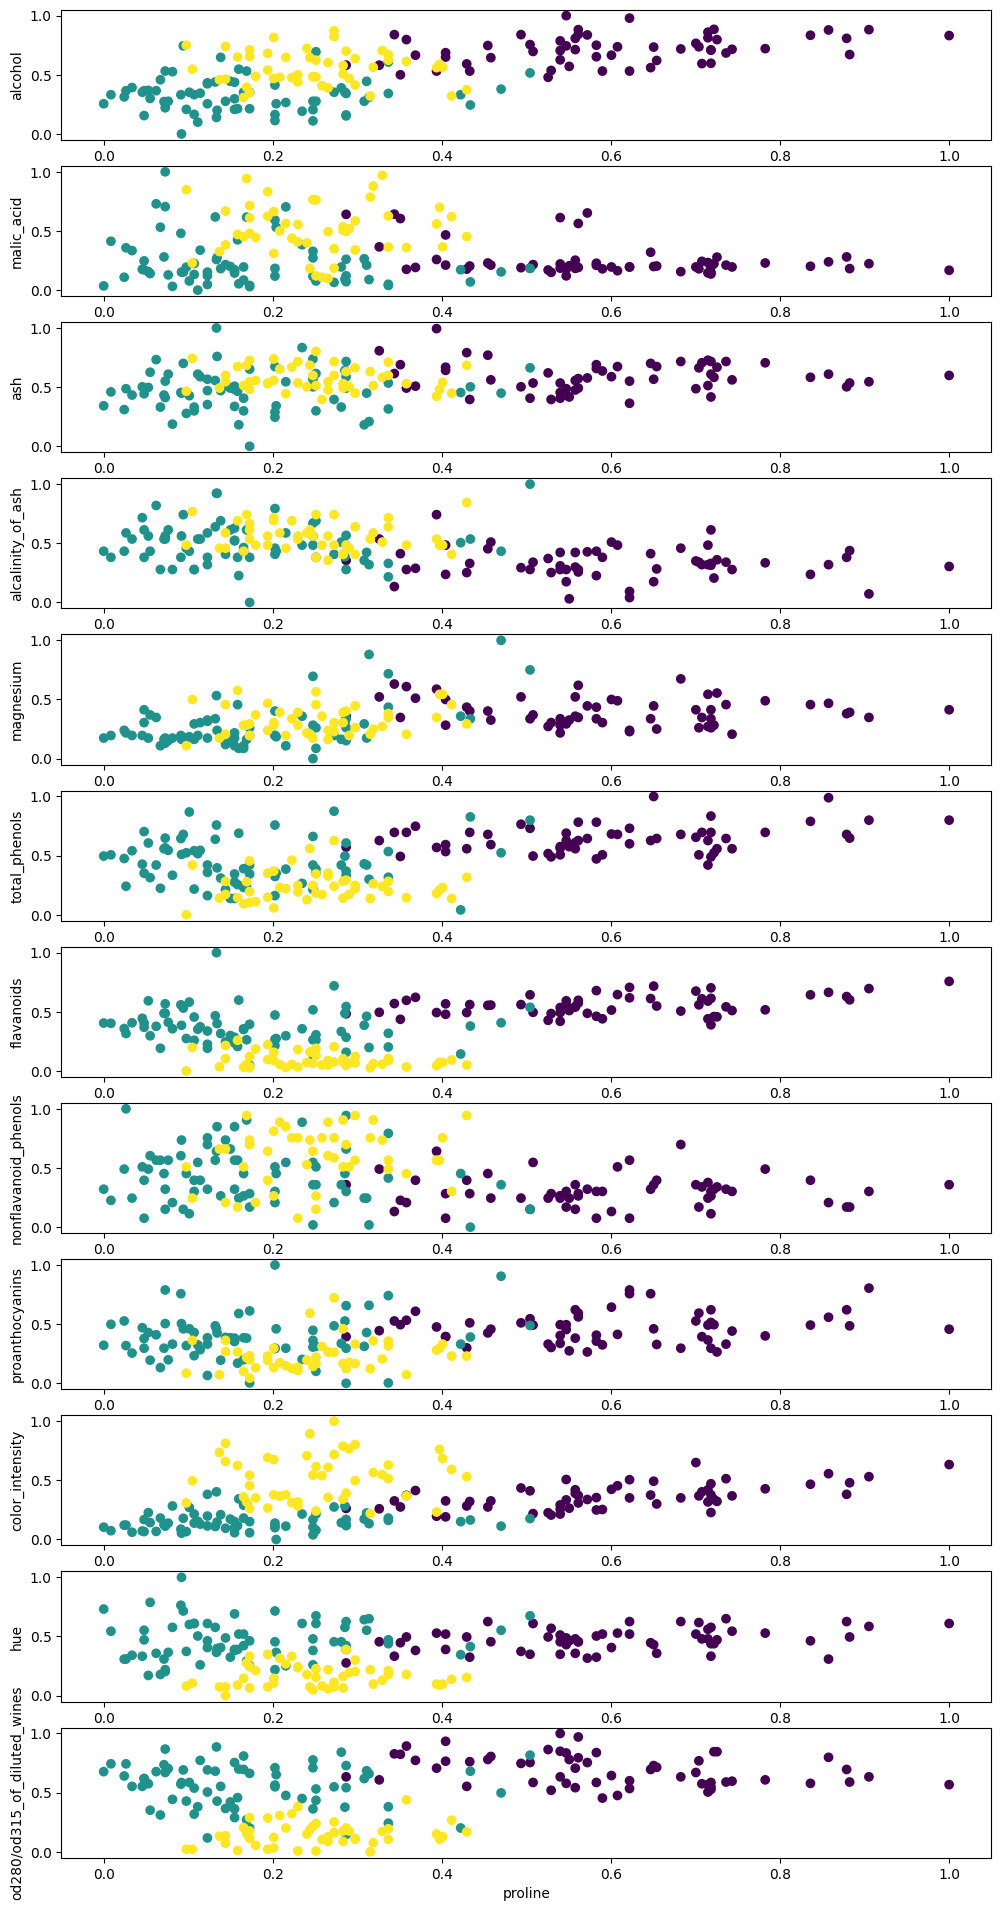

In [36]:
plt_for_feature('proline')

## SVM Classifier

In [51]:
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as score

In [61]:
X = scaled_wine.values
y = wine_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

In [68]:
y_pred = svm_clf.predict(X_test)
y_train_pred = svm_clf.predict(X_train)

## Results

In [73]:
print("Score of trained data: " ,score(y_pred=y_train_pred, y_true=y_train))
print("Score of tested data: " ,score(y_pred=y_pred, y_true=y_test))

Score of trained data:  1.0
Score of tested data:  0.9629629629629629
